<p align="center"><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true"></p><h1><font color='0B5345'> <center>

Procesamiento digital de imágenes

 </center></font></h1>
<h2><font color='0B5345'> <center>
Primer taller: Manipulación de archivos y visualización</center></font></h2>
<font  face="Courier New" size="3">

<p3><center><b><font color='0B5345' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia - Bioingeniería</font></b> </center></p3>

<h3><font color='0B5345'> <center>
Paola Andrea Dávila,
Juliana Lucía Moreno,
Andrés Ruiz Trujillo</center></font></h3>
<font  face="Courier New" size="3">

**Carga y visualización de Imágenes Médicas**

**Descripción:**

Este proyecto tiene como objetivo desarrollar un flujo para la carga y visalización de imágenes médicas en formato DICOM y NIfTI. La aplicación realizará las siguientes tareas:


1. **Cargar y Mostrar Información de Imágenes DICOM:**
   - Cargar imágenes médicas en formato DICOM desde una carpeta especificada.
   - Mostrará la información relevante de cada imagen, incluyendo el nombre del paciente, modalidad, descripción del estudio y fecha de adquisición en formato día, mes y año.

In [29]:
import pydicom
import matplotlib.pyplot as plt
import os
from pydicom.data import get_testdata_file
from pydicom import dcmread
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [7]:
dcm_data = pydicom.dcmread(r'Data\IMG0200.dcm') #Todos las imagenes tienen el mismo nombre de paciente
print(dcm_data[0x0010 , 0x0010])
print(dcm_data[0x0008, 0x0060])
print(dcm_data[0x0008, 0x1030])


fecha_cadena = dcm_data[0x0008, 0x0020].value
# Convertir la cadena a objeto datetime
fecha_datetime = datetime.strptime(fecha_cadena, '%Y%m%d')

# Formatear la fecha como día/mes/año
fecha_formateada = fecha_datetime.strftime('%d/%m/%Y')

# Imprimir la fecha formateada
print(fecha_formateada)
print(dcm_data[0x0010 , 0x0010].value)


(0010, 0010) Patient's Name                      PN: 'CN_0234'
(0008, 0060) Modality                            CS: 'MR'
(0008, 1030) Study Description                   LO: 'BRAIN MRI'
24/10/2022
CN_0234


In [25]:
#Leer un archivo dicom
matriz_img = []
ruta_carpeta= './Data'
arch_dicom = os.listdir(ruta_carpeta)

for archivo in arch_dicom:

    dcm_data = pydicom.dcmread(os.path.join(ruta_carpeta, archivo))
    matriz_img.append(dcm_data)

In [22]:
matriz_img[220]

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 254
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.2.1125.1.50261660232500415340461081840313011
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.2.1143.107.104.103.115.3.0.9.111.124.113
(0002, 0013) Implementation Version Name         SH: 'GDCM 3.0.9'
(0002, 0016) Source Application Entity Title     AE: 'GDCM/ITK 5.3.0'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'MPR']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.2.1125.1.5026166023250041534046108

In [42]:
names = ['Nombre','Identificacion','Modalidad','Descripcion estudio','Fecha Adquisicion','Edad','Sexo']
df=pd.DataFrame(columns=names)
contador=1

for p in matriz_img:
    nombre = p[0x0010 , 0x0010].value
    df.at[contador,'Nombre'] = str(nombre)

    identificacion = p[0x0010 , 0x0020].value
    df.at[contador,'Identificacion'] = str(identificacion)

    modalidad = p[0x0008 , 0x0060].value
    df.at[contador,'Modalidad'] = modalidad

    estudio = p[0x0008 , 0x1030].value
    df.at[contador,'Descripcion estudio'] = estudio
    
    fecha_cadena = p[0x0008, 0x0020].value
    fecha_datetime = datetime.strptime(fecha_cadena, '%Y%m%d')
    fecha_formateada = fecha_datetime.strftime('%d/%m/%Y')

    df.at[contador,'Fecha Adquisicion'] = fecha_formateada

    edad = p[0x0010, 0x0030].value

    edad = relativedelta(fecha_datetime, datetime.strptime(edad, '%Y%m%d'))
    df.at[contador,'Edad'] = edad.years

    sexo = p[0x0010, 0x0040].value
    df.at[contador,'Sexo'] = sexo

    contador+=1



In [43]:
df

,Nombre,Identificacion,Modalidad,Descripcion estudio,Fecha Adquisicion,Edad,Sexo
1,CN_0234,1234567890,MR,BRAIN MRI,24/10/2022,23,M
2,CN_0234,1234567890,MR,BRAIN MRI,24/10/2022,23,M
3,CN_0234,1234567890,MR,BRAIN MRI,24/10/2022,23,M
4,CN_0234,1234567890,MR,BRAIN MRI,24/10/2022,23,M
5,CN_0234,1234567890,MR,BRAIN MRI,24/10/2022,23,M
...,...,...,...,...,...,...,...
239,CN_0234,1234567890,MR,BRAIN MRI,24/10/2022,23,M
240,CN_0234,1234567890,MR,BRAIN MRI,24/10/2022,23,M
241,CN_0234,1234567890,MR,BRAIN MRI,24/10/2022,23,M
242,CN_0234,1234567890,MR,BRAIN MRI,24/10/2022,23,M


2. **Anonimización de Datos Sensibles:**
   - Seleccionar al menos cuatro datos sensibles (por ejemplo, nombre del paciente, ID, fecha de nacimiento, etc.) que serán anonimizados.
   - Se implementará un proceso de anonimización para todos los datos seleccionados en todas las imágenes de la carpeta.
   - Las nuevas imágenes anonimizadas se guardarán en una carpeta designada.

   https://support.qmenta.com/knowledge/what-is-dicom-anonymization
   
   Se escogen 4 datos de la lista encontrada en la página anterior y se identifican para anonimizar en las diferentes imágenes

In [28]:
dcm_data.group_dataset(0x0010)

(0010, 0010) Patient's Name                      PN: 'CN_0234'
(0010, 0020) Patient ID                          LO: '1234567890'
(0010, 0030) Patient's Birth Date                DA: '19990329'
(0010, 0040) Patient's Sex                       CS: 'M'

In [16]:
dcm_data.group_dataset(0x0020)

(0020, 000d) Study Instance UID                  UI: 1.2.826.0.1.3680043.8.498.20315836589392477186329609940459762586
(0020, 000e) Series Instance UID                 UI: 1.2.826.0.1.3680043.8.498.88370686496163536554389859350453710696
(0020, 0010) Study ID                            SH: 'SLICER10001'
(0020, 0011) Series Number                       IS: '1'
(0020, 0013) Instance Number                     IS: '243'
(0020, 0032) Image Position (Patient)            DS: [-74.7006, -135.572, 98.6888]
(0020, 0037) Image Orientation (Patient)         DS: [-.0697157, .996668, -.0423385, .0029543, -.0422353, -.999103]
(0020, 0052) Frame of Reference UID              UI: 1.2.826.0.1.3680043.8.498.50943607912586654189863052454660908373
(0020, 1040) Position Reference Indicator        LO: ''

In [17]:
dcm_data.group_dataset(0x0008)

(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'MPR']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.2.1125.1.93886480935790403093452362464620211
(0008, 0020) Study Date                          DA: '20221024'
(0008, 0021) Series Date                         DA: '20240225'
(0008, 0023) Content Date                        DA: '20240225'
(0008, 0030) Study Time                          TM: '095321'
(0008, 0031) Series Time                         TM: '175217'
(0008, 0033) Content Time                        TM: '175217'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'MR'
(0008, 0070) Manufacturer                        LO: 'Unknown manufacturer'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 1030) Study Description                   LO: 'BRAIN MRI'
(0008, 103e) Series Description        

Tipos de anonimizado:

X - Remove tag.
Z - Replace with a zero length value, or a non-zero length value that may be a dummy value and consistent with the Value Representations
D - Replace with a non-zero length value that may be a dummy value and consistent with the Value Representations

Se escoge 4 datos a anonimizar:               Tipo anonimización
-  (0010, 0020) Patient ID                          Z
-  (0010, 0010) Patient's Name                      Z
-  (0008, 0020) Study Date                          Z
-  (0010, 0030) Patient's Birth Date                Z

In [47]:
contador = 1
for img in matriz_img:
    nombre = img[0x0010 , 0x0010].value = 'P1_243'

    identificacion = img[0x0010 , 0x0020].value = '0000000'

    studydate = img[0x0008, 0x0020].value = '12340101'

    birthdate = img[0x0010, 0x0030].value = '12340101'

    img.save_as(f'Anonymized/NIMG_{str(contador).zfill(4)}.dcm')
    contador += 1 


3. **Visualización de Imágenes NIfTI:**
   - Cargar y visualizar una imagen en formato NIfTI, si la tiene en formato dicom la deberá convertir con dcm2nifti.
   - Se debe visualizar la imagen en los tres planos (axial, sagital, coronal) o en un plano específico.

In [51]:
import dicom2nifti
import nilearn
from nilearn import plotting

In [55]:
import os
# Ruta del directorio que contiene los archivos DICOM
dicom_directory = r"Anonymized"

# Ruta donde se guardarán los archivos NIfTI
nifti_directory = r"Data_NIFTI"

# Función para la conversión de formato
# Convert DICOM to NIfTI
dicom2nifti.convert_directory(dicom_directory, nifti_directory)

Atributos del gráfico:

nlplt.plot_anat(anat_img=<MNI152Template>, cut_coords=None, output_file=None, display_mode='ortho', figure=None, axes=None, title=None, annotate=True, threshold=None, draw_cross=True, black_bg='auto', dim='auto', cmap=<matplotlib.colors.LinearSegmentedColormap object>, colorbar=False, cbar_tick_format='%.2g', radiological=False, vmin=None, vmax=None, **kwargs)


https://nilearn.github.io/dev/modules/generated/nilearn.plotting.plot_anat.html

In [60]:
imagen=r"Data_NIFTI\1_no_series_description.nii.gz"
visualizar=nilearn.image.load_img(imagen)


C:\Users\andrt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\nilearn\image\resampling.py:809: UserWarning: Casting data from int32 to float32
  return resample_img(


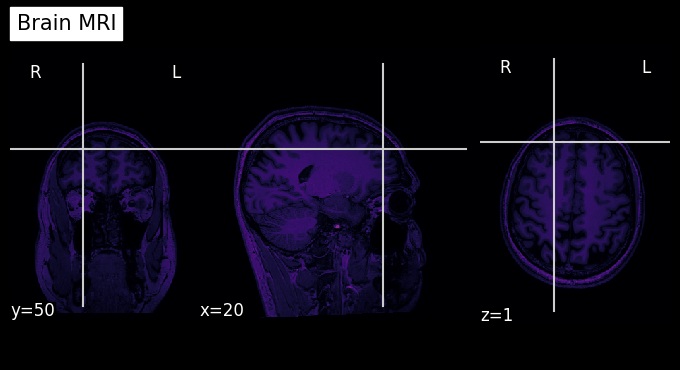

In [62]:
plotting.plot_anat(visualizar,title='Brain MRI',cut_coords=[20,50,1], radiological=True, cmap='magma')

4. **Presentación y estructura:**
   - Orden en el código
   - Implementar el uso de estructuras de control cíclicas
   - Tenga en cuenta que cada media hora de retraso, se penalizará con un 0.5 en la nota final